# Analysis of economic damage from natural disasters

In [21]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Loading dataset
df_nd = pd.read_csv("economic-damage-from-natural-disasters.csv")

In [12]:
df_nd.head()

,Entity,Code,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,NaN,1900,30000000
1,All natural disasters,NaN,1901,0
2,All natural disasters,NaN,1902,0
3,All natural disasters,NaN,1903,480000000
4,All natural disasters,NaN,1904,0


In [6]:
df_nd.shape

(561, 4)

In [4]:
df_nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Entity                                              561 non-null    object 
 1   Code                                                0 non-null      float64
 2   Year                                                561 non-null    int64  
 3   Total economic damage from natural disasters (US$)  561 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 17.7+ KB


In [5]:
df_nd.describe()

,Code,Year,Total economic damage from natural disasters (US$)
count,0.0,561.000000,5.610000e+02
mean,NaN,1977.217469,1.146966e+10
std,NaN,30.399233,3.199525e+10
min,NaN,1900.000000,0.000000e+00
25%,NaN,1959.000000,6.850000e+07
50%,NaN,1984.000000,8.400000e+08
75%,NaN,2001.000000,5.444777e+09
max,NaN,2018.000000,3.640932e+11


In [13]:
df_nd.isnull().sum()

Entity                                                  0
Code                                                  561
Year                                                    0
Total economic damage from natural disasters (US$)      0
dtype: int64

In [15]:
# Pivot the dataframe
df_nd = df_nd.pivot(index = 'Year', columns = 'Entity', 
                                values = 'Total economic damage from natural disasters (US$)')
df_nd.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,30000000.0,NaN,NaN,NaN,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
1901,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,480000000.0,NaN,NaN,NaN,NaN,480000000.0,NaN,NaN,NaN,NaN,NaN
1904,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Finding corelation
df_nd.corr()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Entity,,,,,,,,,,,
All natural disasters,1.000000,0.327939,0.788350,0.206420,0.785908,0.793679,NaN,0.158369,-0.597882,-0.043192,0.235970
Drought,0.327939,1.000000,0.151357,-0.204829,0.229756,0.269914,NaN,-0.101540,-0.969203,0.176855,0.022841
Earthquake,0.788350,0.151357,1.000000,0.193895,0.275411,0.575868,NaN,0.087988,-0.481039,-0.011008,0.004695
Extreme temperature,0.206420,-0.204829,0.193895,1.000000,0.066942,0.062509,NaN,-0.002522,0.130284,0.120918,0.015564
Extreme weather,0.785908,0.229756,0.275411,0.066942,1.000000,0.437438,NaN,-0.036438,-0.631774,-0.105129,0.212451
Flood,0.793679,0.269914,0.575868,0.062509,0.437438,1.000000,NaN,0.468423,-0.405357,-0.128928,0.194618
Impact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Landslide,0.158369,-0.101540,0.087988,-0.002522,-0.036438,0.468423,NaN,1.000000,-0.979197,-0.044597,0.242062
Mass movement (dry),-0.597882,-0.969203,-0.481039,0.130284,-0.631774,-0.405357,NaN,-0.979197,1.000000,NaN,-0.514278


<AxesSubplot:xlabel='Entity', ylabel='Entity'>

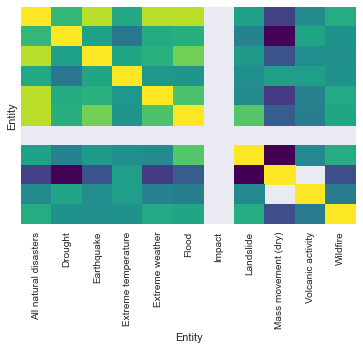

In [23]:
# Heat map
sns.heatmap(df_nd.corr(), yticklabels = False, cbar=False, cmap='viridis')

In [16]:

!pip install autoviz

In [17]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (561, 4)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    4 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables


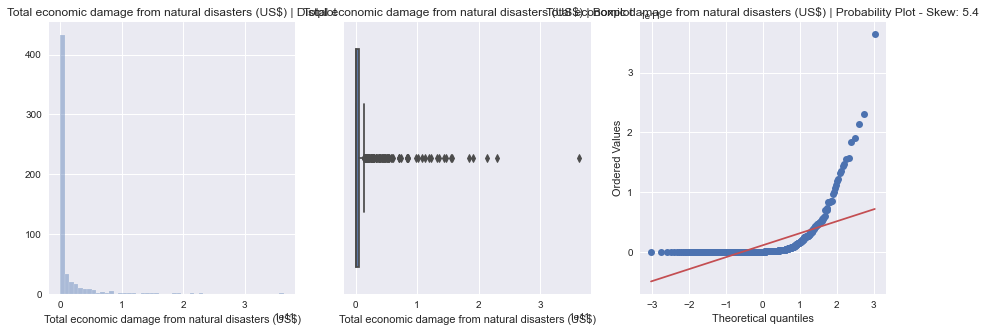

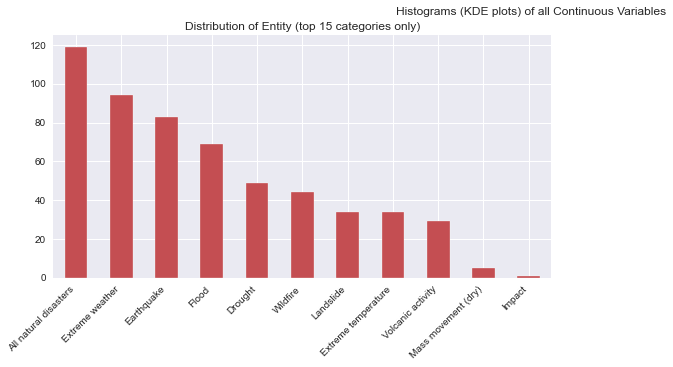

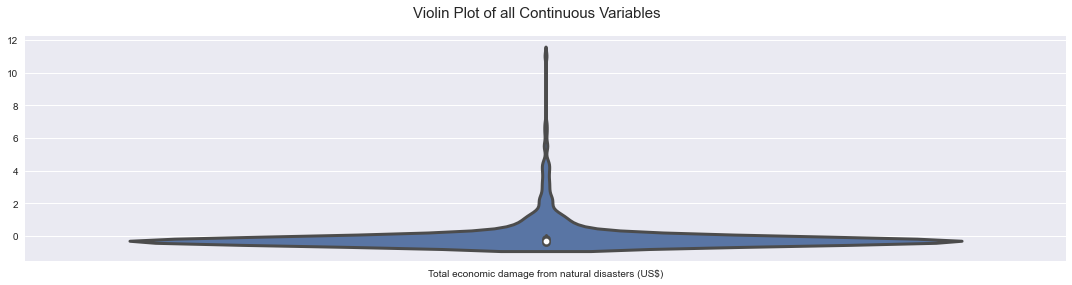

<Figure size 1080x0 with 0 Axes>

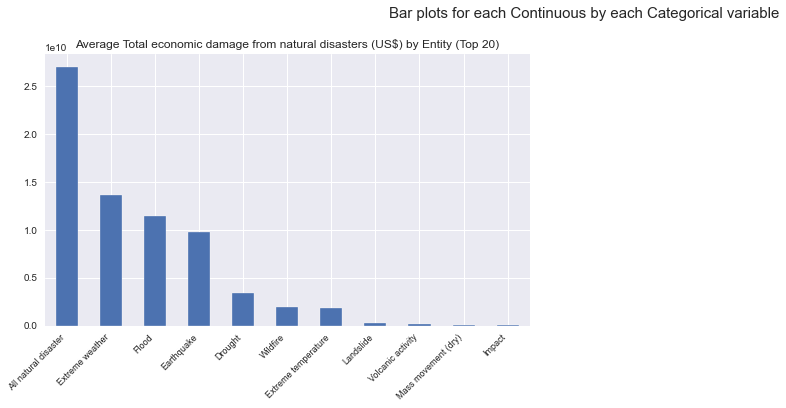

Time to run AutoViz (in seconds) = 4.302

 ###################### VISUALIZATION Completed ########################


In [18]:
filename = "economic-damage-from-natural-disasters.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)